In [ ]:

'''''''''
    總欄位
    United States 哪一州
    Source 資源
    Official/Unofficial 文字格式
    Total Ballots Counted (Estimate)總票數
    Voting-Eligible PopulationVote for Highest Office (President)最高職務投票
    VEP Turnout Rate投票率
    Voting-Eligible Population (VEP) 符合投票資格的人口
    Voting-Age Population 投票年齡人口
    Non-citizen (非公民比例(NEP)
    符合投票資格人口Voting-Eligible Population
'''''''''

In [11]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
%matplotlib.inline
df = pd.read_csv("./archive/2020 November General Election - Turnout Rates.csv")
df.head()

UsageError: Line magic function `%matplotlib.inline` not found.


In [33]:
# 2020年全美選舉的平均
df[df['State'] == 'United States']

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN


In [107]:
Rate_data = {}
Rate_data['State'] = df['State']
Rate_data['VEP Turnout Rate'] = df['VEP Turnout Rate']
Rate_df = pd.DataFrame(Rate_data)
Rate_df = Rate_df.sort_values('VEP Turnout Rate', ascending = True)

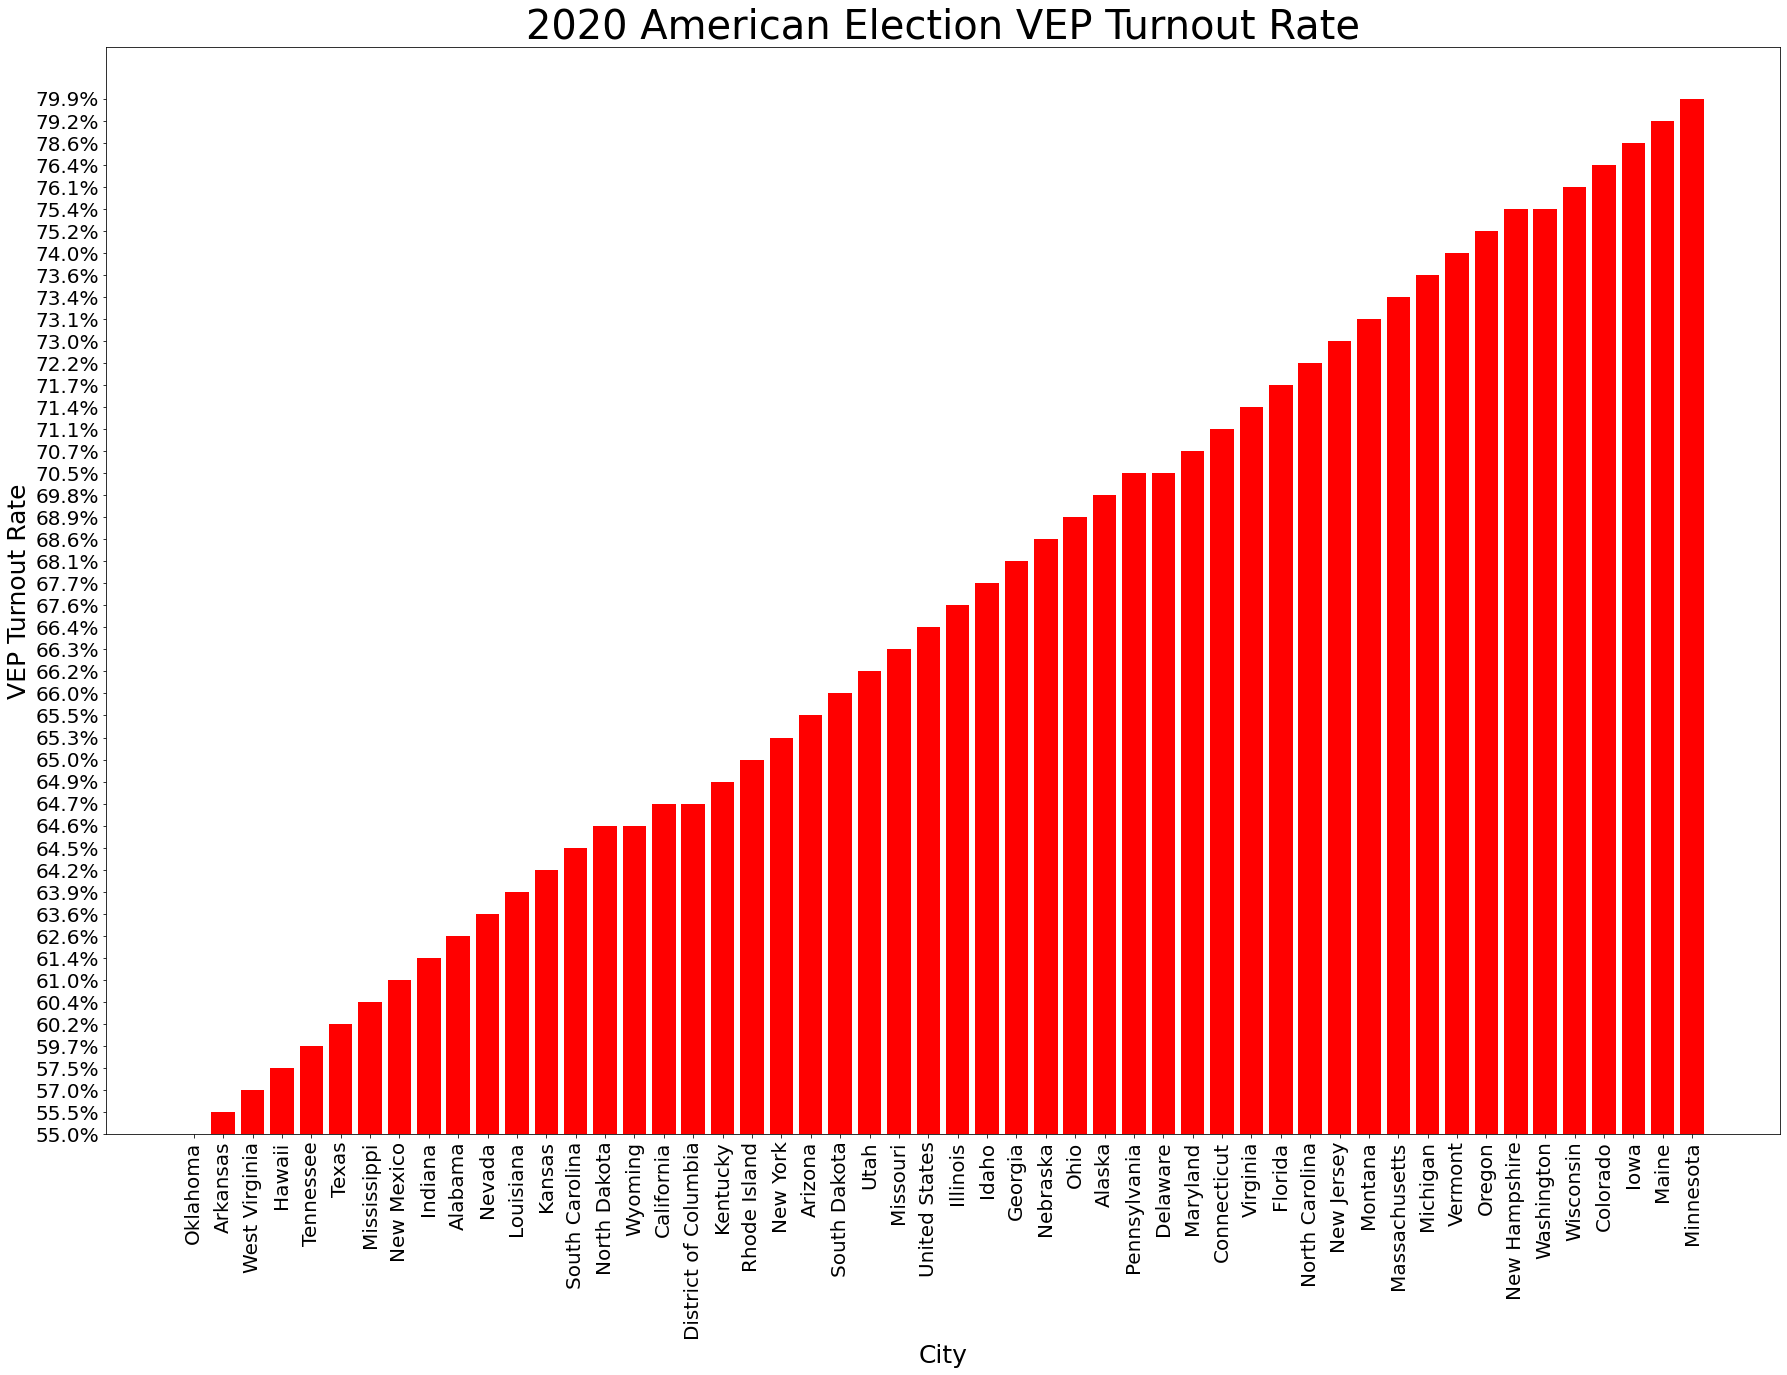

In [108]:
plt.figure(figsize=(30,20))
plt.title("2020 American Election VEP Turnout Rate",fontsize=40)
# plt.plot(Rate_df['State'], Rate_df['VEP Turnout Rate'], color='r', linewidth=3, label="VEP Turnout Rate", )
# plt.hist(Rate_df, color='r', linewidth=1, label="VEP Turnout Rate")
# plt.scatter(Rate_df['State'], Rate_df['VEP Turnout Rate'], color='r', linewidth=3, label="VEP Turnout Rate", )
plt.bar(Rate_df['State'], Rate_df['VEP Turnout Rate'], color='r', linewidth=3, label="VEP Turnout Rate", )

plt.xlabel('City', fontsize=25)
plt.ylabel('VEP Turnout Rate', fontsize=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

In [123]:
df['Voting-Eligible Population (VEP)'] = df['Voting-Eligible Population (VEP)'].str.replace(',' , "").astype('float')

AttributeError: Can only use .str accessor with string values!

In [125]:
# 各洲符合投票年齡的人口
df.sort_values("Voting-Eligible Population (VEP)", ascending = False).head()

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,239247182.0,"257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
5,California,https://electionresults.sos.ca.gov/,Unofficial,"16,800,000",NaN,64.7%,25962648.0,"30,783,255",15.0%,"104,730",0,"102,586","207,316",NaN,CA
44,Texas,https://results.texas-election.com/races,Unofficial,"11,300,000","11,231,799",60.2%,18784280.0,"22,058,260",12.6%,"154,913","368,167","109,213","492,390",NaN,TX
10,Florida,https://floridaelectionwatch.gov/CountyReporti...,NaN,"11,150,000",NaN,71.7%,15551739.0,"17,543,341",10.1%,"91,674","205,033","4,345","223,139",NaN,FL
33,New York,NaN,NaN,"8,930,000",NaN,65.3%,13670596.0,"15,372,655",10.5%,"42,408",0,"45,192","87,600",NaN,NY


In [5]:
!pip install pyrcharts

ERROR: Could not find a version that satisfies the requirement pyrcharts (from versions: none)
ERROR: No matching distribution found for pyrcharts


([<matplotlib.patches.Wedge at 0x1a9186d6548>,
 [Text(-0.5325602839584551, 0.9624861266273348, '(2,3]'),
  Text(-0.26287333637228655, -1.0681280864318206, '(3,4]'),
  Text(0.8004926447691838, -0.7544610829396289, '(4,5]'),
  Text(1.099954392154846, -0.010016744943516995, '(5,6]')])

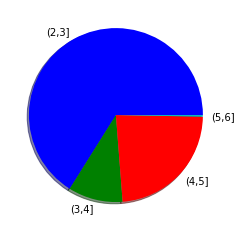

In [12]:
plt.pie([228,35,81,1],labels=('(2,3]','(3,4]', '(4,5]','(5,6]'),colors=('b','g','r','c'),shadow=True)

In [ ]:
'''

箱型圖引數說明：
sym:表示異常點的形狀
vert:是否垂直，箱線圖是橫向的(False)還是豎向的(True)
whis: IQR，預設1.5，也可以設定區間比如[5,95]，代表強制上下邊緣為資料95%和5%位置
patch_artist:上下四分位框內是否填充，True為填充
meanline:是否用線的形式表示均值，預設用點表示
showmeans:是否顯示均值，預設不顯示
showbox:是否顯示箱線圖的箱體
showcaps:是否顯示邊緣線，箱線圖頂端和末端的兩條線預設顯示
showfliers:是否顯示異常值
notch:中間箱體是否缺口
return_type:返回型別


其它
positions:指定箱線圖的位置，預設為[0.1.2...]
widths:指定箱線圖的寬度，預設為0.5

'''

<AxesSubplot:>

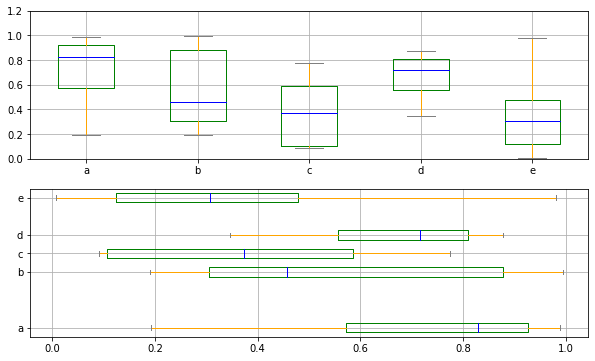

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,1,figsize=(10,6))
df = pd.DataFrame(np.random.rand(10,5),columns=['a','b','c','d','e'])
color = dict(boxes='Green',whiskers='Orange',medians='Blue',caps='Gray')

# 箱線圖著色
# whiskers：分位數與error bar橫線之間豎線的顏色
# medians：中位數線顏色
# caps：error bar橫線顏色

df.plot.box(ylim = [0,1.2],
           grid = True,
           color = color,
           ax = axes[0],
           )

df.plot.box(vert = False,
           positions = [1,4,5,6,8],
           ax = axes[1],
           grid = True,
           color = color,
           )


Text(0.5, 1.0, 'boxplot')

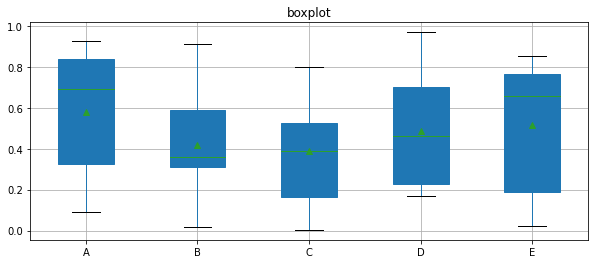

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(np.random.rand(10,5),columns=['A','B','C','D','E'])
plt.figure(figsize =(10,4))


f = df.boxplot(sym = 'o',
              vert = True,
              whis = 1.5,
              patch_artist = True,
              meanline = False,
              showmeans = True,
              showbox = True,
              showcaps = True,
              showfliers = True,
              notch = False, 
              return_type = 'dict'
              )
plt.title('boxplot')

In [31]:
for box in f['boxes']:
    box.set(color='b', linewidth=1)
    box.set(facecolor='b', alpha=0.5)

for whisker in f['whiskers']:
    whisker.set(color='k', linewidth=0.5, linestyle='-')

for cap in f['caps']:
    cap.set(color='gray', linewidth=2)
    
for median in f['medians']:
    median.set(color='DarkBlue', linewidth=2)

    for flier in f['fliers']:
        flier.set(marker='o', color='y', alpha=0.5)
        
# boxes： 箱線
# medians： 中位值的橫線,
# whiskers： 從box到error bar之間的豎線.
# fliers： 異常值
# caps： error bar橫線
# means： 均值的橫線